(40, 3)
[1 1 1 0 1 1 0 0 1 0]
[1 1 1 0 1 1 1 0 1 0]
[[3 0]
 [1 6]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



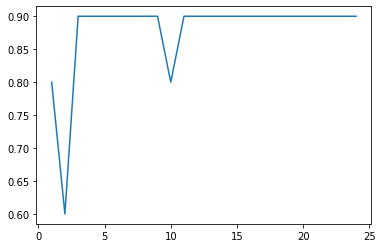

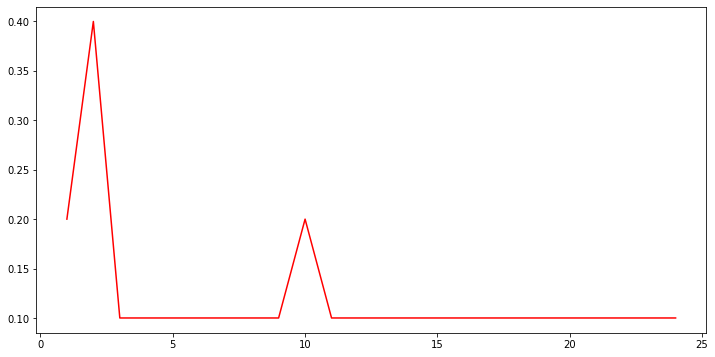

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=50,n_features=3,n_informative=2,n_redundant=1,random_state=1)
trainx,testx,trainy,testy=train_test_split(X,y,test_size=0.2,random_state=4,shuffle=True)
print(trainx.shape)
scaler=StandardScaler()
scaler.fit(trainx)
trainx=scaler.transform(trainx)
testx=scaler.transform(testx)
classifier =KNeighborsClassifier(n_neighbors=5)
classifier.fit(trainx,trainy)
predy=classifier.predict(testx)
print(predy)
print(testy)
print(confusion_matrix(testy,predy))
print(classification_report(testy,predy))
scores={}
scores_list=[]
error=[]
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainx, trainy)
    pred_i = knn.predict(testx)
   
    error.append(np.mean(pred_i != testy))
    scores[i]=metrics.accuracy_score(testy,pred_i)
    scores_list.append(metrics.accuracy_score(testy,pred_i))
plt.plot(range(1,25),scores_list)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red')